In [96]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
n_bin = 5
dlcm = LinearSegmentedColormap.from_list(
        'dl_map', dlcolors, N=n_bin)

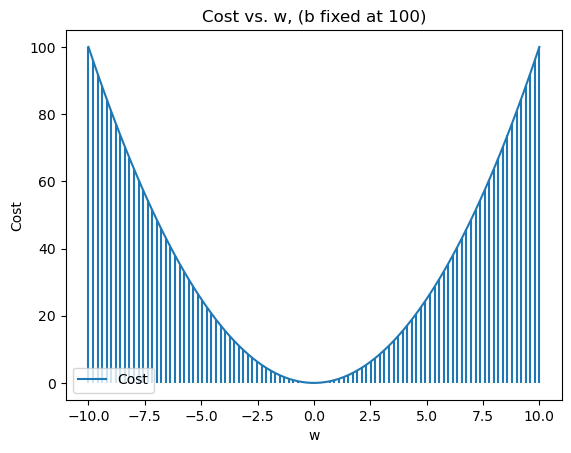

In [76]:
x = np.linspace(-10, 10, 100)
y = x * x

fig, ax = plt.subplots()
ax.plot(x, y, label= f"Cost")
ax.set_title("Cost vs. w, (b fixed at 100)")
ax.set_ylabel('Cost')
ax.set_xlabel('w')
for i in range ( 100 ) :
    ax.vlines ( x[i], 0, y[i])
#ax.hlines ( 5, 0, 5)
ax.legend()
plt.show()


Text(0, 0.5, 'entry b')

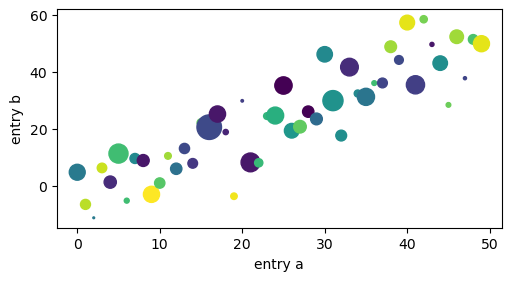

In [46]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

In [150]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = abs((f_wb - y[i]) )
        cost_sum = cost_sum + cost **2
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost
def compute_cost2(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = abs((f_wb - y[i]) )
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost    

[ 82800  78135  73609  69223  64976  60867  56898  53068  49377  45825
  42412  39138  36004  33008  30151  27434  24856  22416  20116  17955
  15933  14050  12306  10701   9236   7909   6721   5673   4764   3993
   3362   2870   2517   2303   2228   2292   2496   2838   3319   3940
   4700   5598   6636   7813   9129  10584  12178  13911  15784  17795
  19945  22235  24664  27231  29938  32784  35769  38893  42156  45558
  49100  52780  56599  60558  64656  68892  73268  77783  82437  87230
  92162  97233 102444 107793 113281 118909 124676 130581 136626 142810]


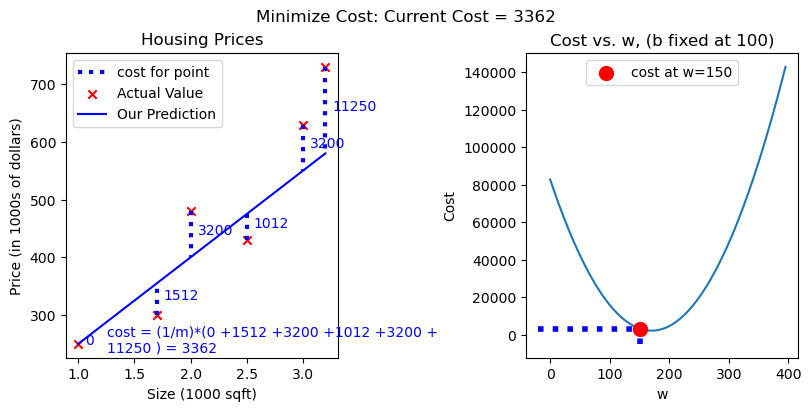

In [152]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])
w = 150
def plt_house_x(X, y,ax=None):
    ''' plot house with aXis '''
    if not ax:
        fig, ax = plt.subplots(1,1)
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")

    ax.set_title("Housing Prices")
    ax.set_ylabel('Price (in 1000s of dollars)')
    ax.set_xlabel(f'Size (1000 sqft)')
    ax.legend()
def plt_house_prediction(X, f_wb=None, ax=None):
    ''' plot house with aXis '''
    if not ax:
        fig, ax = plt.subplots(1,1)
    if f_wb is not None:
        ax.plot(X, f_wb,  c="b", label="Our Prediction")
    ax.legend()
def mk_cost_lines(x,y,w,b, ax):
    ''' makes vertical cost lines'''
    cstr = "cost = (1/m)*("
    ctot = 0
    label = 'cost for point'
    addedbreak = False
    for p in zip(x,y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1],f_wb_p, lw=3, color="b", ls='dotted', label=label)
        label='' #just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',color="b",
            xytext=(5, 0), textcoords='offset points')
        cstr += f"{c_p_txt:0.0f} +"
        if len(cstr) > 38 and addedbreak is False:
            cstr += "\n"
            addedbreak = True
        ctot += c_p
    ctot = ctot/(len(x))
    cstr = cstr[:-1] + f") = {ctot:0.0f}"
    ax.text(0.15,0.02,cstr, transform=ax.transAxes, color="b")
def plt_intuition2(x_train, y_train):

    w_range = np.array([200-200,200+200])
    tmp_b = 100

    w_array = np.arange(*w_range, 5)
    cost = np.zeros_like(w_array)
    for i in range(len(w_array)):
        tmp_w = w_array[i]
        cost[i] = compute_cost(x_train, y_train, tmp_w, tmp_b)

    print (cost)
    f_wb = np.dot(x_train, w) + tmp_b

    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,4))
    fig.canvas.toolbar_position = 'bottom'

    mk_cost_lines(x_train, y_train, w, tmp_b, ax[0])
    plt_house_x(x_train, y_train, ax=ax[0])
    plt_house_prediction(x_train, f_wb=f_wb, ax=ax[0] )

    ax[1].plot(w_array, cost)
    cur_cost = compute_cost(x_train, y_train, w, tmp_b)
    ax[1].scatter(w,cur_cost, s=100, color='r', zorder= 10, label= f"cost at w={w}")
    ax[1].hlines(cur_cost, ax[1].get_xlim()[0],w, lw=4, color='b', ls='dotted')
    ax[1].vlines(w, ax[1].get_ylim()[0],cur_cost, lw=4, color='b', ls='dotted')
    ax[1].set_title("Cost vs. w, (b fixed at 100)")
    ax[1].set_ylabel('Cost')
    ax[1].set_xlabel('w')
    ax[1].legend(loc='upper center')
    fig.suptitle(f"Minimize Cost: Current Cost = {cur_cost:0.0f}", fontsize=12)
    plt.show()
    
plt_intuition2(x_train,y_train)

In [182]:
# this is the 2D cost curve with interactive slider
from matplotlib.gridspec import GridSpec
def plt_stationary(x_train, y_train):
    # setup figure
    fig = plt.figure( figsize=(9,9))
    #fig = plt.figure(constrained_layout=True,  figsize=(12,10))
    fig.set_facecolor('#ffffff') #white
    fig.canvas.toolbar_position = 'top'
    #gs = GridSpec(2, 2, figure=fig, wspace = 0.01)
    gs = GridSpec(2, 2, figure=fig)
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 0],  projection='3d')
    ax3 = fig.add_subplot(gs[1, 1],  projection='3d')
    ax = np.array([ax0,ax1,ax2,ax3])

    #setup useful ranges and common linspaces
    w_range = np.array([200-300.,200+300])
    b_range = np.array([50-300., 50+300])
    b_space  = np.linspace(*b_range, 100)
    w_space  = np.linspace(*w_range, 100)

    # get cost for w,b ranges for contour and 3D
    tmp_b,tmp_w = np.meshgrid(b_space,w_space)
  
    z=np.zeros_like(tmp_b)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            z[i,j] = compute_cost2(x_train, y_train, tmp_w[i][j], tmp_b[i][j] )
            if z[i,j] == 0: z[i,j] = 1e-6

    w0=200;b=-100    #initial point
    ### plot model w cost ###
    f_wb = np.dot(x_train,w0) + b
    mk_cost_lines(x_train,y_train,w0,b,ax[0])
    plt_house_x(x_train, y_train,  ax=ax[0])
    plt_house_prediction(x_train, f_wb=f_wb, ax=ax[0])

    ### plot contour ###
    CS = ax[1].contour(tmp_w, tmp_b, np.log(z),levels=12, linewidths=2, alpha=0.7,colors=dlcolors)
    ax[1].set_title('Cost(w,b)')
    ax[1].set_xlabel('w', fontsize=10)
    ax[1].set_ylabel('b', fontsize=10)
    ax[1].set_xlim(w_range) ; ax[1].set_ylim(b_range)
    cscat  = ax[1].scatter(w0,b, s=100, color=dlblue, zorder= 10, label="cost with \ncurrent w,b")
    chline = ax[1].hlines(b, ax[1].get_xlim()[0],w0, lw=4, color=dlpurple, ls='dotted')
    cvline = ax[1].vlines(w0, ax[1].get_ylim()[0],b, lw=4, color=dlpurple, ls='dotted')
    ax[1].text(0.5,0.95,"Click to choose w,b",  bbox=dict(facecolor='white', ec = 'black'), fontsize = 10,
                transform=ax[1].transAxes, verticalalignment = 'center', horizontalalignment= 'center')

    #Surface plot of the cost function J(w,b)
    ax[2].plot_surface(tmp_w, tmp_b, z,  cmap = dlcm, alpha=0.3, antialiased=True)
    ax[2].plot_wireframe(tmp_w, tmp_b, z, color='k', alpha=0.1)
    plt.xlabel("$w$")
    plt.ylabel("$b$")
    ax[2].zaxis.set_rotate_label(False)
    ax[2].xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].set_zlabel("J(w, b)\n\n", rotation=90)
    plt.title("Cost(w,b) \n [You can rotate this figure]", size=12)
    ax[2].view_init(10, -120)

        #Surface plot of the cost function J(w,b)
    #ax[3].plot_surface(tmp_w, tmp_b, z,  cmap = dlcm, alpha=0.3, antialiased=True)
    #ax[3].plot_wireframe(tmp_w, tmp_b, z, color='k', alpha=0.1)
    ax[3].plot([0,0],[0,100],[100,200])
    for i in range(len(w_space)):
        for j in range(len(b_space)):
            ax[3].plot([w_space[i],w_space[i]],[b_space[j],b_space[j]],[0,z[i,j]])
    
    ax[3].zaxis.set_rotate_label(False)
    ax[3].xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[3].yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[3].zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[3].set_zlabel("J(w, b)\n\n", rotation=90)
    ax[3].view_init(10, -120)

    return fig,ax, [cscat, chline, cvline]


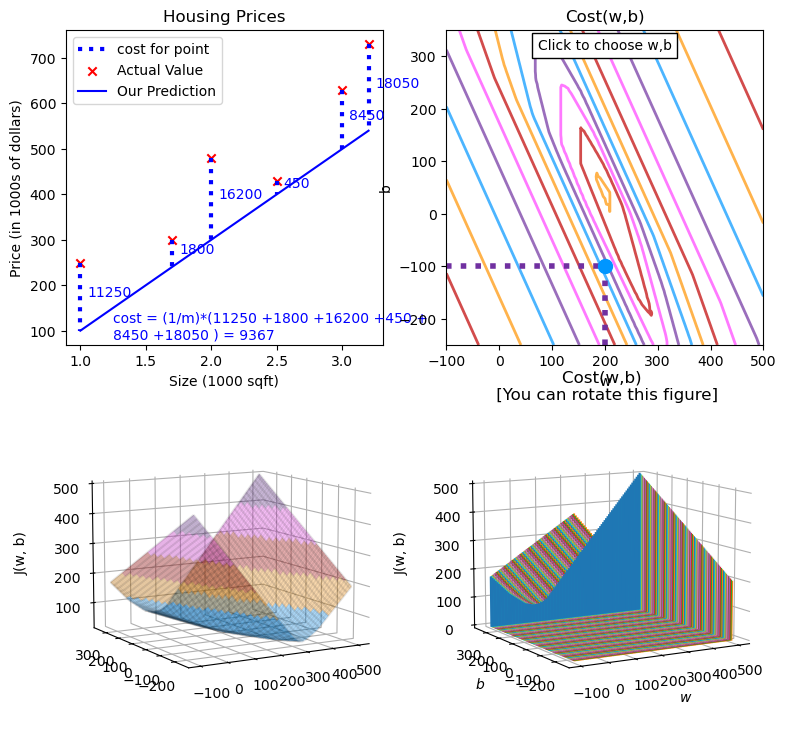

In [183]:
fig, ax, dyn_items = plt_stationary(x_train, y_train)

In [122]:
aa = [1,2]
bb = [3,4,5]
ma, mb = np.meshgrid(aa,bb)
print ( ma)
print ( mb)
                      

[[1 2]
 [1 2]
 [1 2]]
[[3 3]
 [4 4]
 [5 5]]


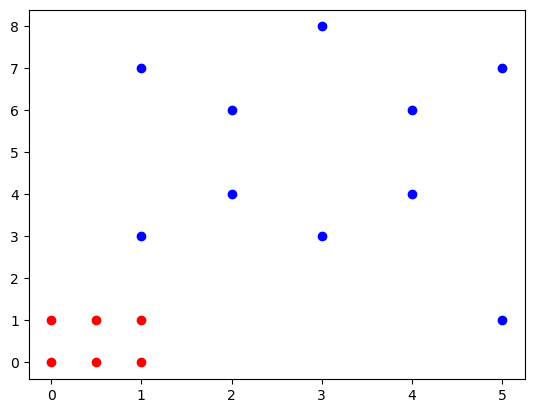

In [147]:
import numpy as np
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
plt.plot([[ 1,2,3,4,5],[ 1,2,3,4,5]], [[3,4,3,4,1],[7,6,8,6,7]],  marker='o', color='b', linestyle='none')
plt.plot(xv,yv,  marker='o', color='r', linestyle='none')
plt.show()

In [129]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [128]:
xv


array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])